In [1]:
import pandas as pd
import sys
import os
scripts_path = "../scripts"
sys.path.append(scripts_path)


In [2]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)

from time_analysisss import load_data

df = load_data("../data/raw/EW- time table for downward.csv")



In [3]:
import sys
sys.path.append('../scripts')  # adjust if needed

import importlib
import passenger_flow_utils
importlib.reload(passenger_flow_utils)

from passenger_flow_utils import basic_checks


In [4]:
df.columns

Index(['Stations ', 'Stations-code ', 'Train times', '10103', '10203', '10303',
       '10403', '10503', '10603', '10703', '10803', '10105', '10205', '10305',
       '10405', '10505', '10605', '10705', '10805', '10107', '10207', '10307',
       '10407', '10507', '10607', '10707', '10807', '10109', '10209', '10309',
       '10409', '10509', '10609', '10709', '10809', '10111', '10211', '10311',
       '10411', '10511', '10611', '10711', '10811', '10113', '10213', '10313',
       '10413', '10513', '10613', '10713', '10813', '10115', '10215', '10315',
       '10415', '10515', '10615', '10715', '10815', '10117', '10217', '10317',
       '10517', '10617', '10717', '10119'],
      dtype='object')

In [5]:
df.head()

,Stations,Stations-code,Train times,10103,10203,10303,10403,10503,10603,10703,...,10615,10715,10815,10117,10217,10317,10517,10617,10717,10119
0,ST-1,EW22,Returning,6:00:00,6:15:00,6:30:00,6:45:00,7:00:00,7:15:00,7:30:00,...,19:15:00,19:30:00,19:45:00,20:00:00,20:15:00,20:30:00,20:50:00,21:10:00,21:30:00,22:00:00
1,ST-2,EW22,Returning,6:00:00,6:15:00,6:30:00,6:45:00,7:00:00,7:15:00,7:30:00,...,19:15:00,19:30:00,19:45:00,20:00:00,20:15:00,20:30:00,20:50:00,21:10:00,21:30:00,22:00:00
2,ST-3,EW21,Arrive,6:01:49,6:16:49,6:31:49,6:46:49,7:01:49,7:16:49,7:31:49,...,19:16:49,19:31:49,19:46:49,20:01:49,20:16:49,20:31:49,20:51:49,21:11:49,21:31:49,22:01:49
3,ST-4,EW21,Departure,6:02:19,6:17:19,6:32:19,6:47:19,7:02:19,7:17:19,7:32:19,...,19:17:19,19:32:19,19:47:19,20:02:19,20:17:19,20:32:19,20:52:19,21:12:19,21:32:19,22:02:19
4,ST-5,EW20,Arrive,6:03:47,6:18:47,6:33:47,6:48:47,7:03:47,7:18:47,7:33:47,...,19:18:47,19:33:47,19:48:47,20:03:47,20:18:47,20:33:47,20:53:47,21:13:47,21:33:47,22:03:47


In [6]:
# drop rows with Train times column = returning
df = df[df['Train times'] != 'Returning '] 

# Perform Basic Checks on Raw Data
The basic_checks function is called to get a comprehensive summary of the raw data, including its shape, data types, and null value counts.

In [7]:
basic_checks(df)

--- Shape ---
(42, 66)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 2 to 43
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Stations        42 non-null     object
 1   Stations-code   42 non-null     object
 2   Train times     42 non-null     object
 3   10103           42 non-null     object
 4   10203           42 non-null     object
 5   10303           42 non-null     object
 6   10403           42 non-null     object
 7   10503           42 non-null     object
 8   10603           42 non-null     object
 9   10703           42 non-null     object
 10  10803           42 non-null     object
 11  10105           42 non-null     object
 12  10205           42 non-null     object
 13  10305           42 non-null     object
 14  10405           42 non-null     object
 15  10505           42 non-null     object
 16  10605           42 non-null     object
 17  10705           42 non-n

# Drop Columns with High NaN Percentage
Columns with a significant amount of missing data (over 30%) are removed from the DataFrame.

In [8]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import drop_high_nan_columns

df = drop_high_nan_columns(df, threshold=0.30)


Dropping columns with > 30.0% NaNs: []


# Rename Columns
Key columns are renamed to be more intuitive, such as changing

In [9]:
# raname columns for better readability
df = df.rename(columns={'Stations-code ': 'station_id'})
df = df.rename(columns={'Train times': 'arrival_departure'})
df = df.rename(columns={'Stations ': 'Stations'})



# Reshape Data from Wide to Long Format
The melt_and_pivot_train_schedule function is used to convert the data from a wide format to a long format, making it easier to analyze time-based events.

In [10]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import melt_and_pivot_train_schedule

df_pivot = melt_and_pivot_train_schedule(df)

c:\Users\nebiy\OneDrive\Documents\code\Train-Passenger-Flow-Analysis\notebooks\../scripts\time_analysisss.py:34: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pivot['Arrival'] = pd.to_datetime(df_pivot['Arrival'], errors='coerce')
c:\Users\nebiy\OneDrive\Documents\code\Train-Passenger-Flow-Analysis\notebooks\../scripts\time_analysisss.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_pivot['Departure'] = pd.to_datetime(df_pivot['Departure'], errors='coerce')


# Perform Basic Checks on processed Data
The basic_checks function is called to get a comprehensive summary of the processed data, including its shape, data types, and null value counts.

In [11]:
basic_checks(df_pivot)

--- Shape ---
(2646, 5)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646 entries, 0 to 2645
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Stations    2646 non-null   object        
 1   station_id  2646 non-null   object        
 2   train_id    2646 non-null   object        
 3   Arrival     1323 non-null   datetime64[ns]
 4   Departure   1323 non-null   datetime64[ns]
dtypes: datetime64[ns](2), object(3)
memory usage: 103.5+ KB

--- Null Values ---
arrival_departure
Stations         0
station_id       0
train_id         0
Arrival       1323
Departure     1323
dtype: int64

--- Descriptive Statistics ---
arrival_departure                        Arrival  \
count                                       1323   
mean               2025-08-06 14:08:26.428571136   
min                          2025-08-06 06:01:49   
25%                          2025-08-06 10:11:30   
50%                 

In [12]:
df_pivot.head()

arrival_departure,Stations,station_id,train_id,Arrival,Departure
0,ST-10,EW18,10103,NaT,2025-08-06 06:08:23
1,ST-10,EW18,10105,NaT,2025-08-06 08:08:23
2,ST-10,EW18,10107,NaT,2025-08-06 10:08:23
3,ST-10,EW18,10109,NaT,2025-08-06 12:08:23
4,ST-10,EW18,10111,NaT,2025-08-06 14:08:23


In [13]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import fill_missing_times_with_station_avg

#df_pivot = fill_missing_times_with_station_avg(df_pivot)


In [14]:
# datatype of arrival and departure times
print(df_pivot['Arrival'].dtype)
print(df_pivot['Departure'].dtype)

datetime64[ns]
datetime64[ns]


In [15]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import calculate_dwell_time
df_pivot = calculate_dwell_time(df_pivot)


In [16]:
basic_checks(df_pivot)

--- Shape ---
(2646, 6)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2646 entries, 0 to 2645
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   Stations    2646 non-null   object         
 1   station_id  2646 non-null   object         
 2   train_id    2646 non-null   object         
 3   Arrival     2646 non-null   datetime64[ns] 
 4   Departure   2646 non-null   datetime64[ns] 
 5   Dwell Time  2646 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), object(3), timedelta64[ns](1)
memory usage: 124.2+ KB

--- Null Values ---
arrival_departure
Stations      0
station_id    0
train_id      0
Arrival       0
Departure     0
Dwell Time    0
dtype: int64

--- Descriptive Statistics ---
arrival_departure                        Arrival  \
count                                       2646   
mean               2025-08-06 12:10:06.332199680   
min                          2025-08-06 06:01:4

# Compute Station Arrival Gap Statistics
The compute_station_gap_stats function is used to calculate metrics related to the time intervals between train arrivals at each station.

In [17]:
import importlib
import time_analysisss
importlib.reload(time_analysisss)
from time_analysisss import compute_station_gap_stats

station_stats = compute_station_gap_stats(df_pivot)

Computed station gap stats:
   Stations   Avg_Gap  Min_Gap  Max_Gap   Gap_Std
16    ST-26  7.504608      0.0     15.0  7.556665
36    ST-44  7.504608      0.0     15.0  7.556665
34    ST-42  7.505952      0.0     15.0  7.555368
14    ST-24  7.505952      0.0     15.0  7.555368
29    ST-38  7.507296      0.0     15.0  7.554084
32    ST-40  7.507296      0.0     15.0  7.554084
2     ST-12  7.507296      0.0     15.0  7.554084
0     ST-10  7.507296      0.0     15.0  7.554084
38     ST-6  7.507296      0.0     15.0  7.554084
31     ST-4  7.507296      0.0     15.0  7.554084
4     ST-14  7.507296      0.0     15.0  7.554084
40     ST-8  7.507296      0.0     15.0  7.554084
21    ST-30  7.508641      0.0     15.0  7.552816
8     ST-18  7.508641      0.0     15.0  7.552816
25    ST-34  7.508641      0.0     15.0  7.552816
23    ST-32  7.508641      0.0     15.0  7.552816
18    ST-28  7.508641      0.0     15.0  7.552816
12    ST-22  7.508641      0.0     15.0  7.552816
10    ST-20  7.508641 

Filter Out Station first and last stations  because of missing arrival and departure date or high dwell time 

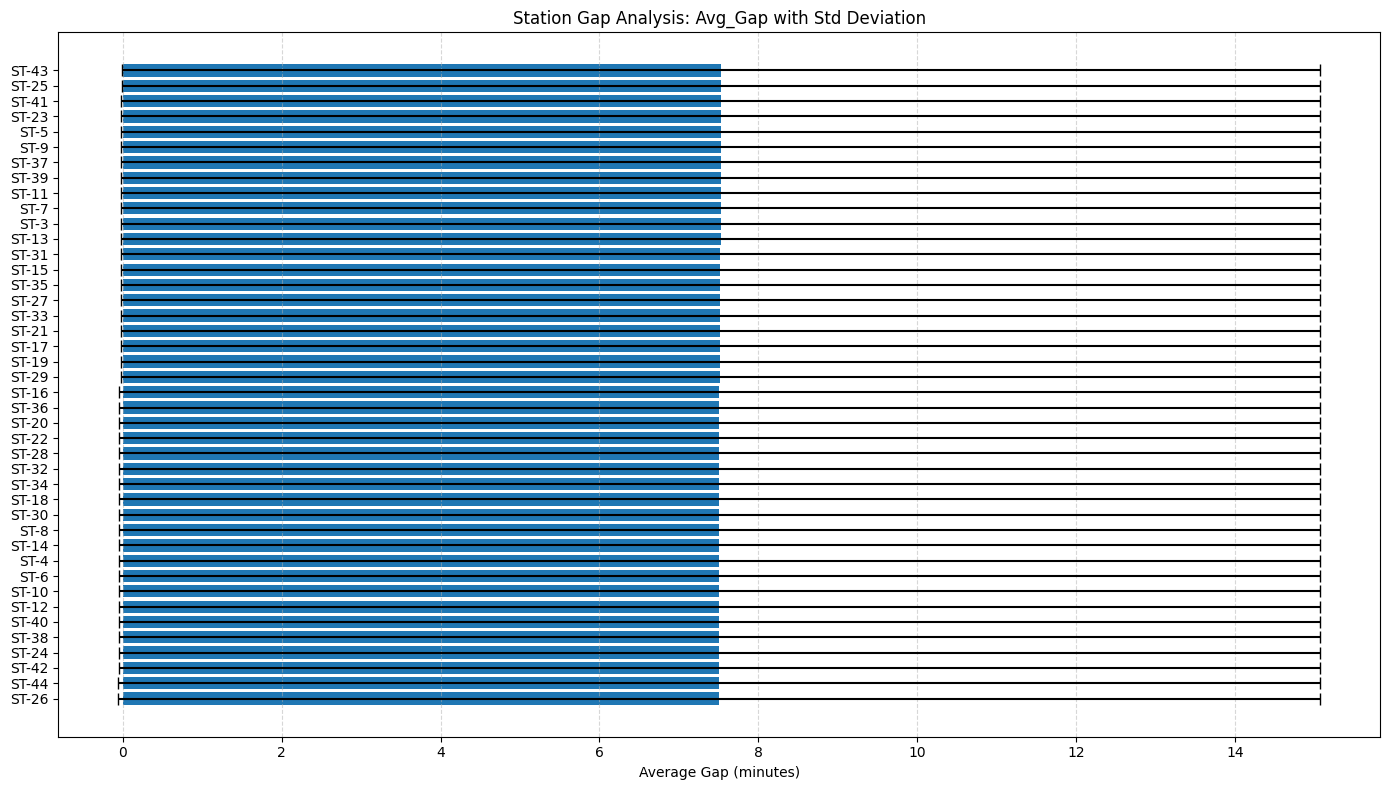

In [18]:
import importlib
import plot_utils  # This must succeed; make sure plot_utils.py is in the same directory or in PYTHONPATH

importlib.reload(plot_utils)

# Sort by Avg_Gap for better visualization
df_sorted = station_stats.sort_values("Avg_Gap")

plot_utils.plot_dwell_time_distribution(df_sorted)


In [19]:
df_pivot = df_pivot [df_pivot ['station_id'] != 'NS6']
df_pivot = df_pivot [df_pivot ['station_id'] != 'NS27']


# Visualize Data Statistics
The plot_utils module is used to create several visualizations of the processed NS downward line data, including plots of average arrival gaps and dwell times.

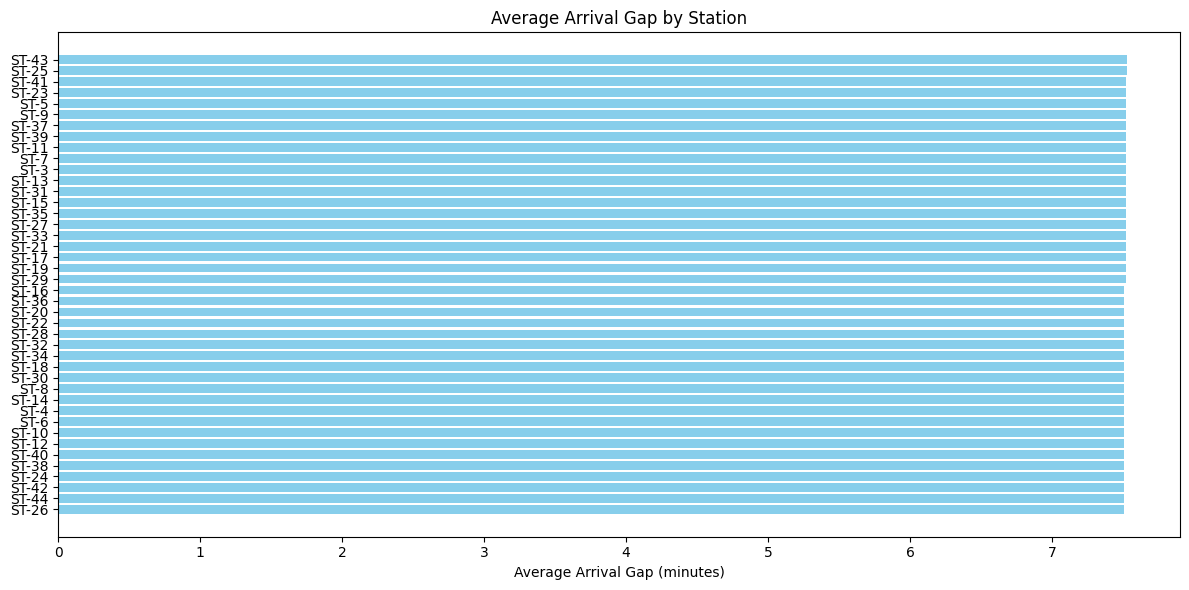

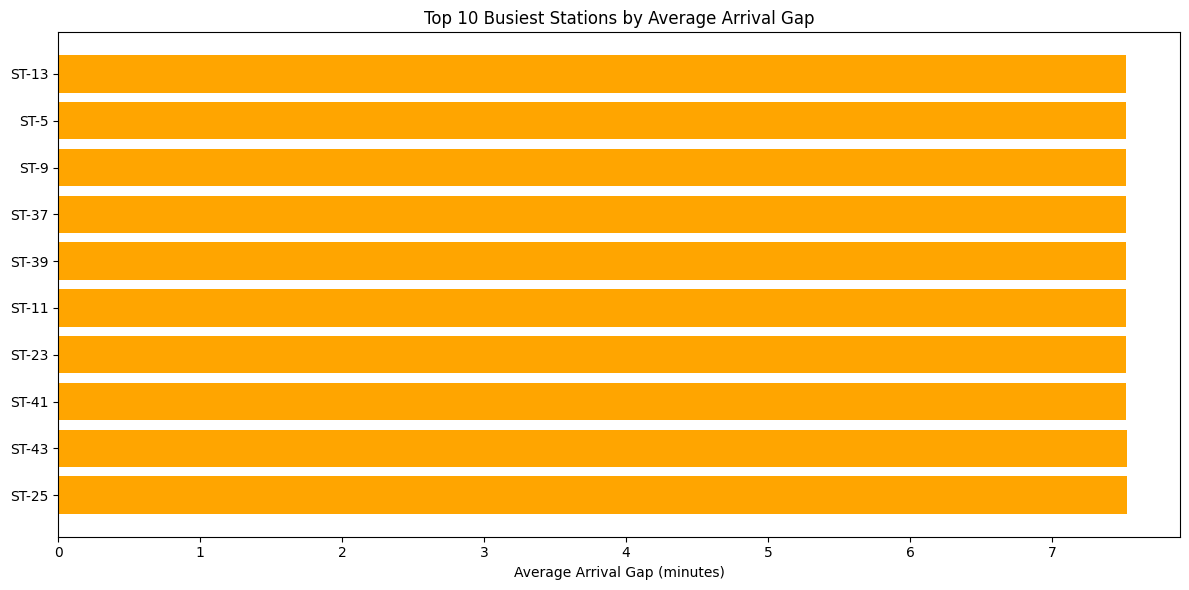

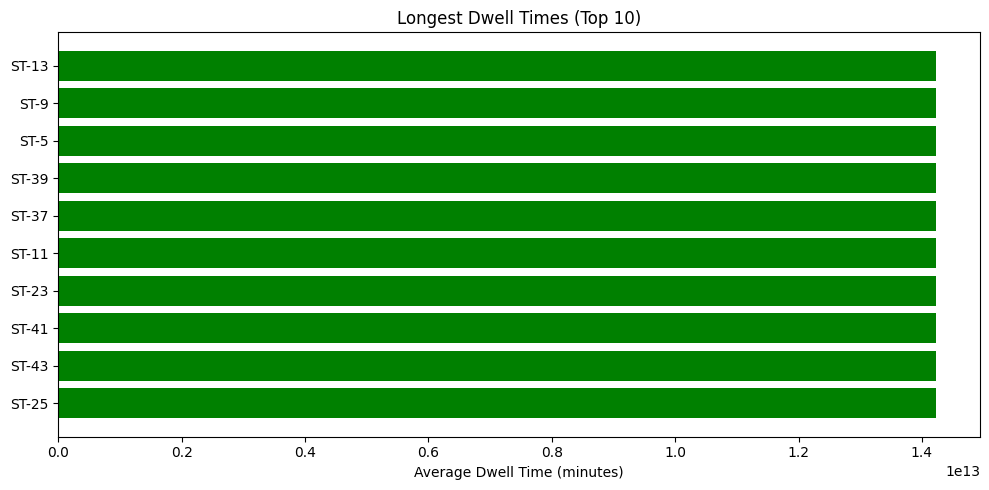

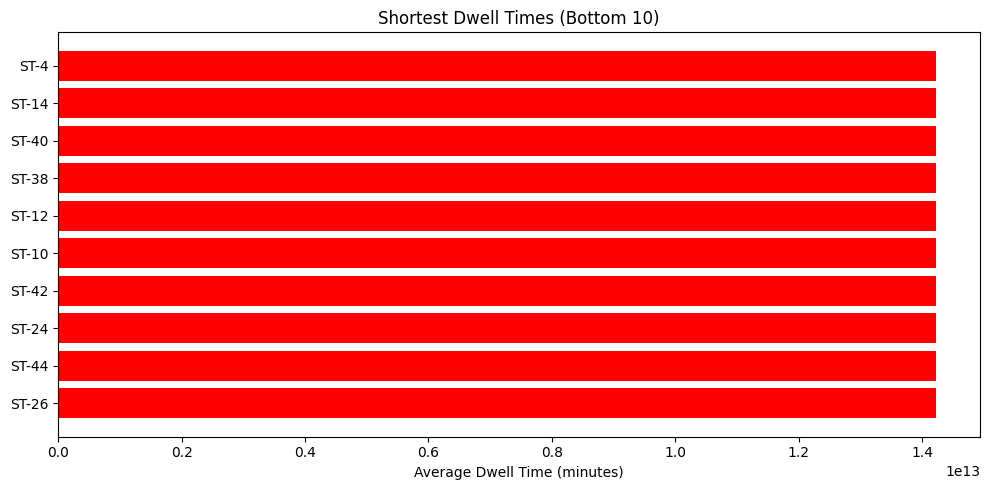

In [20]:
import importlib
import plot_utils  # This must succeed; make sure plot_utils.py is in the same directory or in PYTHONPATH

importlib.reload(plot_utils)

plot_utils.plot_avg_arrival_gap(station_stats)
plot_utils.plot_top_avg_gaps(station_stats)
plot_utils.plot_dwell_time_extremes(df_pivot)


In [21]:
df_pivot.columns

Index(['Stations', 'station_id', 'train_id', 'Arrival', 'Departure',
       'Dwell Time'],
      dtype='object', name='arrival_departure')

# Calculate and Display Average Dwell Time
A new DataFrame is created to show the average dwell time for each station. It's calculated by grouping df_pivot by 'station_id' and finding the mean of 'Dwell Time'.

In [22]:
# a new dataframe with the stations,station_id and the average dwell time
avg_dwell_time = df_pivot.groupby('station_id')['Dwell Time'].mean().reset_index()
avg_dwell_time = avg_dwell_time.rename(columns={'Dwell Time': 'Average Dwell Time'})
avg_dwell_time.head(50)

,station_id,Average Dwell Time
0,EW1,0 days 03:57:09.478458051
1,EW10,0 days 03:57:09.478458051
2,EW11,0 days 03:57:09.478458049
3,EW12,0 days 03:57:09.478458049
4,EW13,0 days 03:57:09.478458049
5,EW14,0 days 03:57:09.478458046
6,EW15,0 days 03:57:09.478458051
7,EW16,0 days 03:57:09.478458049
8,EW17,0 days 03:57:09.478458049
9,EW18,0 days 03:57:09.478458049


# check for outliers on Dwell time

In [23]:
print(df_pivot[df_pivot['Dwell Time'] > pd.Timedelta(minutes=10)][["Stations","Dwell Time"]])
print(df_pivot[df_pivot['Dwell Time'] < pd.Timedelta(minutes=0)][["Stations","Dwell Time"]])


arrival_departure Stations                Dwell Time
0                    ST-10 0 days 07:45:27.142856960
1                    ST-10 0 days 05:45:27.142856960
2                    ST-10 0 days 03:45:27.142856960
3                    ST-10 0 days 01:45:27.142856960
4                    ST-10 0 days 00:14:32.857143040
...                    ...                       ...
2640                  ST-9 0 days 04:01:27.142857216
2641                  ST-9 0 days 02:01:27.142857216
2643                  ST-9 0 days 01:58:32.857142784
2644                  ST-9 0 days 03:58:32.857142784
2645                  ST-9 0 days 05:58:32.857142784

[2604 rows x 2 columns]
Empty DataFrame
Columns: [Stations, Dwell Time]
Index: []


In [24]:
avg_dwell_time.head()

,station_id,Average Dwell Time
0,EW1,0 days 03:57:09.478458051
1,EW10,0 days 03:57:09.478458051
2,EW11,0 days 03:57:09.478458049
3,EW12,0 days 03:57:09.478458049
4,EW13,0 days 03:57:09.478458049


In [25]:
#save df_privot as csv
df_pivot.to_csv('../data/processed/NS-time table for_processed_Downward.csv', index=False)

In [26]:
df_pivot.columns

Index(['Stations', 'station_id', 'train_id', 'Arrival', 'Departure',
       'Dwell Time'],
      dtype='object', name='arrival_departure')